In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
def create_model_with_dropout():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_with_dropout = create_model_with_dropout()

C:\Users\User\PycharmProjects\pythonProject3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
def create_model_without_dropout():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_without_dropout = create_model_without_dropout()
history_without_dropout = model_without_dropout.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9344 - loss: 0.2318 - val_accuracy: 0.9753 - val_loss: 0.0804
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9790 - loss: 0.0703 - val_accuracy: 0.9810 - val_loss: 0.0606
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0468 - val_accuracy: 0.9827 - val_loss: 0.0488
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9899 - loss: 0.0339 - val_accuracy: 0.9858 - val_loss: 0.0425
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9916 - loss: 0.0268 - val_accuracy: 0.9845 - val_loss: 0.0470
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9946 - loss: 0.0184 - val_accuracy: 0.9859 - val_loss: 0.0423
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9855 - val_loss: 0.0449
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9967 - loss: 0.0114 - val_accuracy: 0.

In [4]:
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9004 - loss: 0.3328 - val_accuracy: 0.9704 - val_loss: 0.0937
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9600 - loss: 0.1331 - val_accuracy: 0.9800 - val_loss: 0.0603
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9697 - loss: 0.1013 - val_accuracy: 0.9825 - val_loss: 0.0541
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9753 - loss: 0.0838 - val_accuracy: 0.9852 - val_loss: 0.0440
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9771 - loss: 0.0748 - val_accuracy: 0.9863 - val_loss: 0.0425
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9799 - loss: 0.0648 - val_accuracy: 0.9867 - val_loss: 0.0384
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9822 - loss: 0.0581 - val_accuracy: 0.9872 - val_loss: 0.0388
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9823 - loss: 0.0554 - val_accuracy: 0.

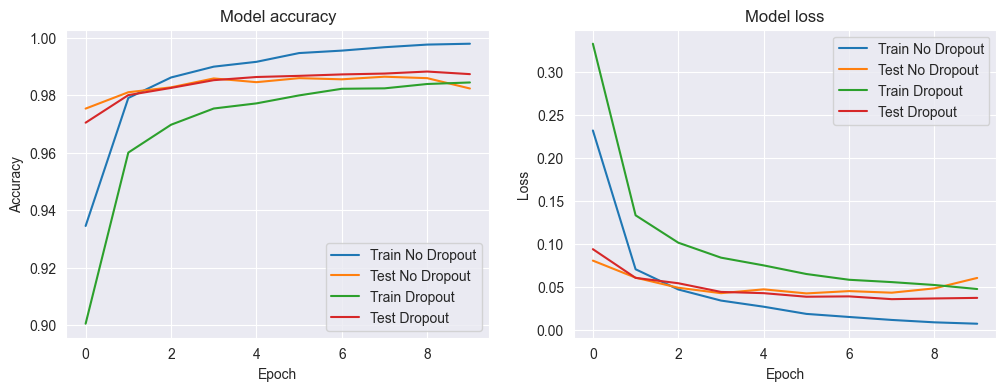

In [6]:
import matplotlib.pyplot as plt

def plot_results(history_no_dropout, history_dropout):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history_no_dropout.history['accuracy'])
    plt.plot(history_no_dropout.history['val_accuracy'])
    plt.plot(history_dropout.history['accuracy'])
    plt.plot(history_dropout.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train No Dropout', 'Test No Dropout', 'Train Dropout', 'Test Dropout'], loc='lower right')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history_no_dropout.history['loss'])
    plt.plot(history_no_dropout.history['val_loss'])
    plt.plot(history_dropout.history['loss'])
    plt.plot(history_dropout.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train No Dropout', 'Test No Dropout', 'Train Dropout', 'Test Dropout'], loc='upper right')

    plt.show()

plot_results(history_without_dropout, history_with_dropout)